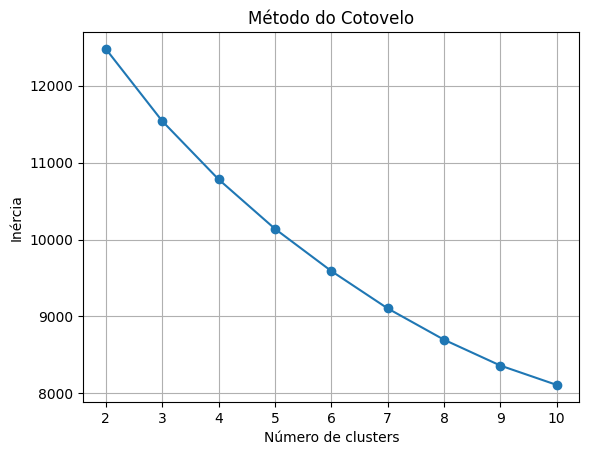

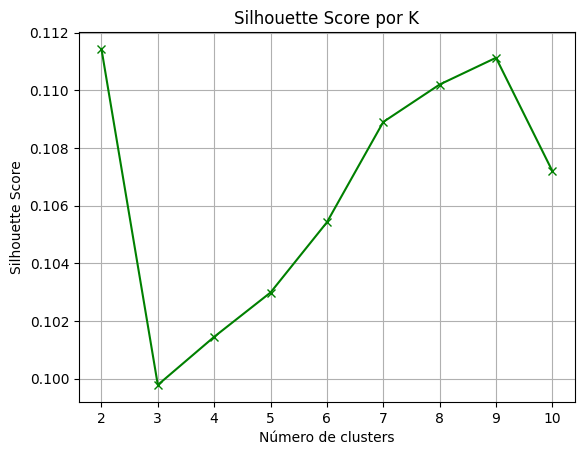

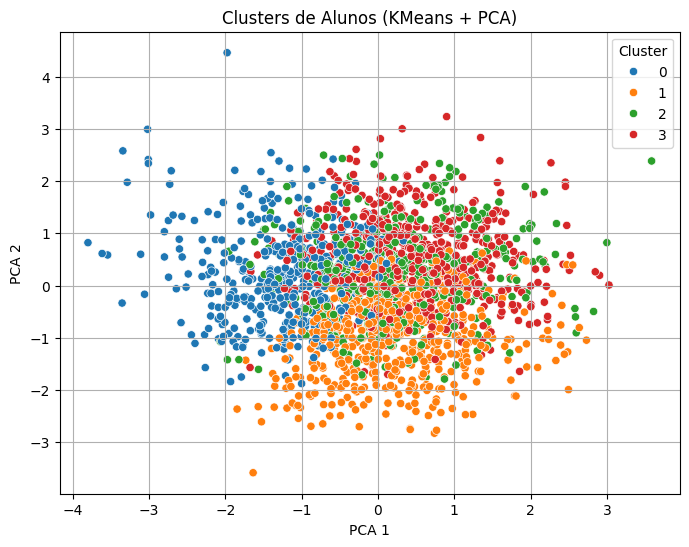

Dados exportados.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


#Carregando os dados tratados
df = pd.read_csv("dados_tratados/fato_final_aluno.csv")


#Selecionando as features que irei utilizar
features_cluster = [
    "idade", "semanas_presentes", "total_avaliacoes",
    "perda_peso", "ganho_forca", "total_feedbacks", "media_nota"
]
df_cluster = df[features_cluster].fillna(0)


#Padronizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)


#Encontrando o número ideal de clusters usando o método do cotovelo
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

#Gerando o gráfico Elbow
plt.plot(k_range, inertia, marker='o')
plt.title("Método do Cotovelo")
plt.xlabel("Número de clusters")
plt.ylabel("Inércia")
plt.grid(True)
plt.show()

#Gerando o gráfico Silhouette
plt.plot(k_range, silhouette_scores, marker='x', color='green')
plt.title("Silhouette Score por K")
plt.xlabel("Número de clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


#Aplicando o KMeans com o número que foi ideal de clusters
k_opt = 4  
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled)


# Visualização com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["pca1"] = X_pca[:, 0]
df["pca2"] = X_pca[:, 1]


#Visualizando os clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="pca1", y="pca2", hue="cluster", palette="tab10")
plt.title("Clusters de Alunos (KMeans + PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

#exportando os dados em CSV
df.to_csv("dados_modelo/cluster_alunos.csv", index=False)
print("Dados exportados.")